In [3]:
import pandas as pd
import numpy as np
import os

In [10]:
%run sqlite_execution.py
db1 = DB_V1()
# db1.drop_duplicates()
# db1.drop_unuseable_images(commit=True)
# db1.cur.execute("UPDATE captchas_v1 SET captcha_string = 'headphones' WHERE captcha_string = 'Please click each image containing headphones'")
# db1.cur.execute("UPDATE captchas_v1 SET file_path = REPLACE(file_path, 'Please click each image containing headphones', 'headphones')")
# db1.commit()
info = db1.get_info()
info

,total,solved,unsolved
headphones,2560,2560,0
laptop,2005,2005,0
diamond bracelet,2001,2001,0
cup of orange juice,2002,1702,300
flower,1670,1670,0
tree,2008,1040,968
bonsai tree,1235,984,251
car,1493,755,738
motorcycle,1335,309,1026
violin,249,249,0


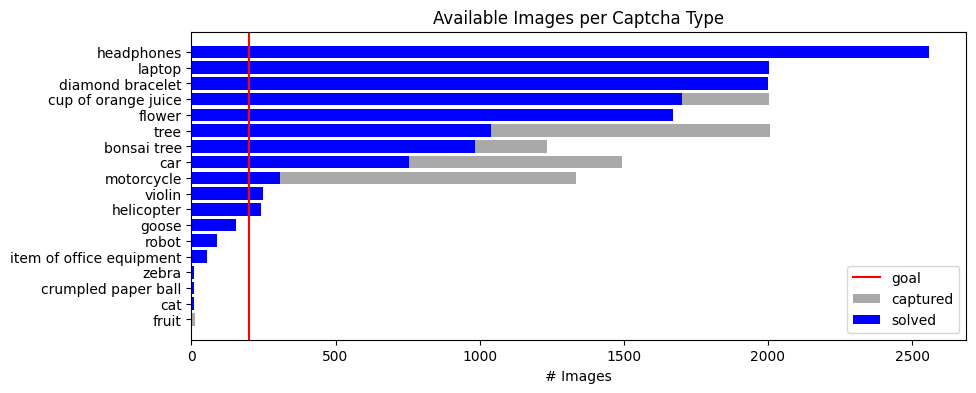

In [11]:
%run visualizer.py
plot_captcha_info(info, figsize=(4,10))

In [7]:
%run pytorch_training.py
train_model_on_captcha_string(db1, "headphones", save=True, epochs=30)
# train_models_on_all_captcha_strings(db1, threshold=350, save=True, only_updated=False, epochs=50, augment_images=True)

Training model on headphones...
Fount 1000 useable images
x shape: (1000, 3, 128, 128)
y shape: (1000, 1)
train size: 736, test size: 264
single element shape: torch.Size([3, 128, 128])
Epoch: 1, Test Loss: 0.0020, Accuracy: 201/264, 76.14%
Epoch: 2, Test Loss: 0.0011, Accuracy: 239/264, 90.53%
Epoch: 3, Test Loss: 0.0009, Accuracy: 238/264, 90.15%
Epoch: 4, Test Loss: 0.0007, Accuracy: 245/264, 92.80%
Epoch: 5, Test Loss: 0.0006, Accuracy: 247/264, 93.56%
Epoch: 6, Test Loss: 0.0006, Accuracy: 247/264, 93.56%
Epoch: 7, Test Loss: 0.0007, Accuracy: 245/264, 92.80%
Epoch: 8, Test Loss: 0.0006, Accuracy: 249/264, 94.32%
Epoch: 9, Test Loss: 0.0007, Accuracy: 247/264, 93.56%
Epoch: 10, Test Loss: 0.0007, Accuracy: 247/264, 93.56%
Epoch: 11, Test Loss: 0.0006, Accuracy: 251/264, 95.08%
Epoch: 12, Test Loss: 0.0007, Accuracy: 245/264, 92.80%
Epoch: 13, Test Loss: 0.0007, Accuracy: 251/264, 95.08%
Epoch: 14, Test Loss: 0.0007, Accuracy: 253/264, 95.83%
Epoch: 15, Test Loss: 0.0007, Accuracy:

In [8]:
model_info = db1.get_model_info()
model_info

,date,path,samples,training_samples,testing_samples,accuracy,better_than_90,better_than_95
bonsai tree,2023-08-18,bonsai tree/23-230_03,1720,1472,248,0.963710,0.999954,0.875852
car,2023-08-18,car/23-230_01,615,512,103,0.970874,0.998503,0.893542
cup of orange juice,2023-08-18,cup of orange juice/23-230_02,719,608,111,0.990991,0.999992,0.996632
diamond bracelet,2023-08-19,diamond bracelet/23-231_01,1000,736,264,0.950758,0.999083,0.562047
flower,2023-08-18,flower/23-230_02,868,736,132,0.977273,0.999888,0.963418
goose,2023-08-16,goose/23-228_01,131,96,35,0.828571,0.131636,0.007252
headphones,2023-08-19,headphones/23-231_01,1000,736,264,0.973485,0.999999,0.979396
helicopter,2023-08-18,helicopter/23-230_03,418,352,66,0.893939,0.494087,0.046416
laptop,2023-08-18,laptop/23-230_07,1023,864,159,0.974843,0.999943,0.959803
motorcycle,2023-08-18,motorcycle/23-230_01,533,448,85,1.000000,1.000000,1.000000


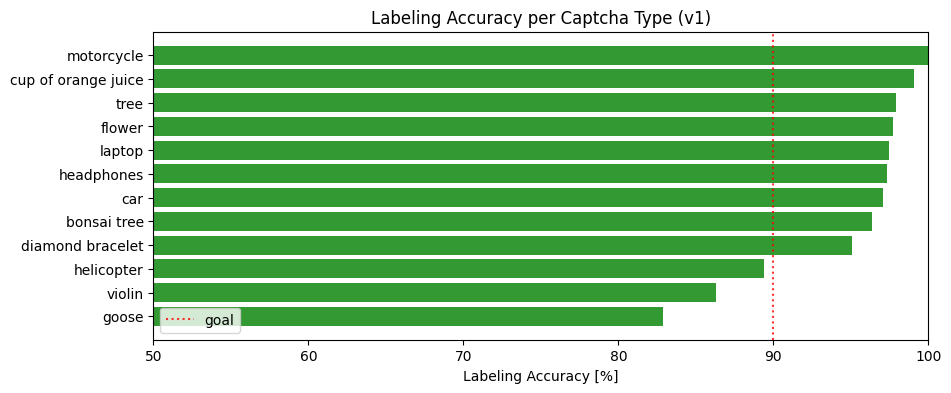

In [9]:
%run visualizer.py
plot_model_accuracy(model_info)

In [7]:
db1.load_models_into_src(threshold=0.9)

bonsai tree bonsai tree/23-230_03
File copied and renamed to: ../src/hcaptcha_solver/models//bonsai tree
car car/23-230_01
File copied and renamed to: ../src/hcaptcha_solver/models//car
cup of orange juice cup of orange juice/23-230_02
File copied and renamed to: ../src/hcaptcha_solver/models//cup of orange juice
diamond bracelet diamond bracelet/23-231_01
File copied and renamed to: ../src/hcaptcha_solver/models//diamond bracelet
flower flower/23-230_02
File copied and renamed to: ../src/hcaptcha_solver/models//flower
headphones headphones/23-230_01
File copied and renamed to: ../src/hcaptcha_solver/models//headphones
laptop laptop/23-230_07
File copied and renamed to: ../src/hcaptcha_solver/models//laptop
motorcycle motorcycle/23-230_01
File copied and renamed to: ../src/hcaptcha_solver/models//motorcycle
tree tree/23-230_04
File copied and renamed to: ../src/hcaptcha_solver/models//tree


In [10]:
assert 1 == 0 # to avoid execution of code below

AssertionError: 

In [5]:
%run collector/collector.py
urls = [
    # "https://accounts.hcaptcha.com/demo",
    # "https://nopecha.com/demo/hcaptcha",
    # "https://democaptcha.com/demo-form-eng/hcaptcha.html",
    # "https://freebitco.in/signup/?op=s", 
    # "https://accounts.shopify.com/signup?rid=f8d4b2e6-f0fe-41ab-83e5-e633974bd42b&signup_strategy=password",
    # "https://www.dierenkliniekoudorp.nl/",
    # "https://cellar335.com/",
    # "https://www.salumificiovecchi.it/",
    # "https://economygarages.com/",
    # "https://www.assimilationdesigns.com/"
    # "https://raleighvehiclewraps.com/"
    "https://ludwig7685.github.io/Easy/",
    "https://ludwig7685.github.io/Moderate/",
    "https://ludwig7685.github.io/Hard/",
    ]
collect_data(db1, urls[0], count=1000, collect_v2=False, limit=2000)

Loaded Website
Launched hCaptcha
Switched to Captcha
Captcha V1
headphones      : Added 9 rows to db
headphones      : Saved 9 images to disk
Captcha V1
headphones      : Added 7 rows to db
Captcha V1
headphones      : Saved 7 images to disk
ERROR: Message: stale element reference: stale element not found
  (Session info: headless chrome=115.0.5790.173); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
Backtrace:
	GetHandleVerifier [0x00007FF6813E4A62+57106]
	(No symbol) [0x00007FF68135CF52]
	(No symbol) [0x00007FF68122E2CB]
	(No symbol) [0x00007FF6812322B2]
	(No symbol) [0x00007FF681233F93]
	(No symbol) [0x00007FF68129EBAB]
	(No symbol) [0x00007FF6812869BA]
	(No symbol) [0x00007FF68129E522]
	(No symbol) [0x00007FF681286793]
	(No symbol) [0x00007FF68125CE81]
	(No symbol) [0x00007FF68125E064]
	GetHandleVerifier [0x00007FF681694222+2873042]
	GetHandleVerifier [0x00007FF6816

KeyboardInterrupt: 

In [6]:
%run manual_classifier.py
mc = Manual_Classifier(db1)

Setting images for headphones
labeled headphones/15-11-21-55-422919_1.png as True
labeled headphones/16-10-01-39-192619_2.png as False
labeled headphones/17-11-26-11-603803_2.png as True
labeled headphones/17-11-26-37-555448_8.png as False
labeled headphones/17-11-36-02-688453_7.png as False
labeled headphones/20-12-47-52-899517_6.png as True
labeled headphones/20-12-47-54-220784_0.png as True
labeled headphones/20-12-47-57-651772_7.png as True
labeled headphones/20-12-47-59-979156_7.png as True
Setting images for headphones
labeled headphones/15-11-20-48-750131_3.png as False
labeled headphones/16-10-02-23-694958_3.png as True
labeled headphones/17-11-36-16-366590_8.png as False
labeled headphones/17-11-36-23-731907_1.png as False
labeled headphones/17-11-36-52-472724_2.png as True
labeled headphones/17-11-38-16-991573_5.png as False
labeled headphones/17-11-38-58-938562_1.png as True
labeled headphones/20-12-47-26-126872_3.png as True
labeled headphones/20-12-47-54-837575_4.png as Fa

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Sheikh\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\Sheikh\Desktop\githubScripts\hCaptchaSolver\dev\manual_classifier.py", line 120, in <lambda>
    command=lambda button_index=i: self.clicked_button(button_index),
  File "C:\Users\Sheikh\Desktop\githubScripts\hCaptchaSolver\dev\manual_classifier.py", line 129, in clicked_button
    if self.selected_images[i] == False:
IndexError: list index out of range


labeled headphones/15-11-20-48-750131_7.png as False
labeled headphones/17-11-36-07-028117_7.png as False
Setting images for headphones


In [13]:
%run vilt.py
vilt = Vilt_Classifier()

c:\Users\Sheikh\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Sheikh\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Sheikh\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see

In [14]:
vilt_accuracy = pd.concat((info, vilt.get_accuracy_for_all_captchas(db1)), axis=1)
plot_model_accuracy(vilt_accuracy, figsize=(4,10))

Calculating accuracy for 12 captchas which satisfied the threshold of 50 solved images
Calculating accuracy for diamond bracelet using 1000 images


RuntimeError: [enforce fail at ..\c10\core\impl\alloc_cpu.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 1953792000 bytes.